# STEP 01: IMPORTING DATA

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
import tensorflow as tf
print(tf.__version__)

1.15.2


In [4]:
from tensorflow import keras

In [5]:
# Import tensorflow's MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist

# Load fashion dataset into the set for training & testing 
(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()


In [6]:
# The original dataset comes with the shape [image_index, 28_, 28_]
# We flatten the data into the shape [image_index, 784 (28_ + 28_)]

#training_data = np.array([img_train.flatten() for img_train in train_data],)
training_data = np.array([data.flatten() for data in train_data], dtype='float32')
# Convert List to array and then Tranpose in order to have an Array of [img_index, 1]
training_label = np.array([train_label]).T

In [7]:
testing_data = np.array([data.flatten() for data in test_data],dtype='float32')
# Convert List to array and then Tranpose in order to have an Array of [img_index, 1]
testing_label = np.array([test_label]).T

# STEP 02 : VISUALIZING DATA 

In [35]:
#shape of trainning and testing data
print(training_data.shape)
print(training_label.shape)
print(testing_data.shape)
print(testing_label.shape)

(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)


Label for this image is: 5


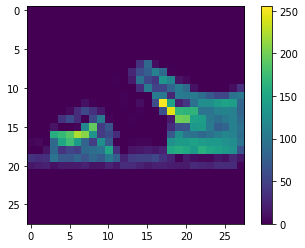

In [36]:
import random
# generate a randox img index for training_data
i = random.randint(1,60000)
#showing training data
print('Label for this image is: ' + str(training_label[i,0]))
plt.figure()
plt.imshow(training_data[i, 0:].reshape(28,28), cmap='viridis')
plt.colorbar()
plt.grid(False)
plt.show()

# This are the label classes:
# 0 => 'T-shirt/top'
# 1 => 'Trouser'
# 2 => 'Pullover'
# 3 => 'Dress'
# 4 => 'Coat'
# 5 => 'Sandal'
# 6 => 'Shirt'
# 7 => 'Sneaker'
# 8 =>  'Bag'
# 9 => 'Ankle boot'

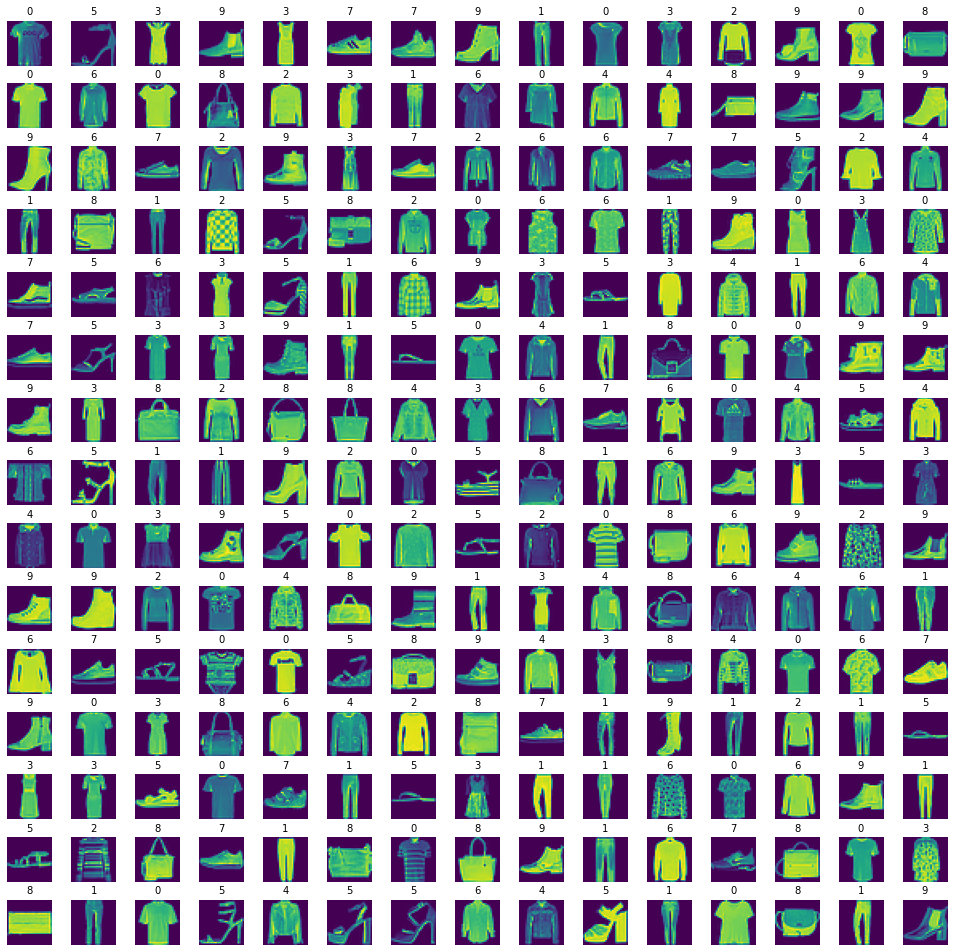

In [37]:
# lets visualize a set of images in order to have a better image of the problem
# define the demensions of the plot grid
W_grid = 15
L_grid = 15

# fig, size = plt.subplots(L_grid,w_grid)

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flatten the 15 x 15 matrix into 255 array

n_training = len(training_data)

for i in np.arange(0, W_grid * L_grid):
  
  # select random number
  index = random.randint(0, n_training)
  axes[i].imshow(training_data[index, 0:].reshape(28,28), cmap='viridis')
  axes[i].set_title(training_label[index,0], fontsize = 10)
  axes[i].axis('off')
  
plt.subplots_adjust(hspace=0.4)



#STEP 03: TRAINING MODEL 

In [38]:
# Prepare the training and testing dataset 
# normalize the training & testing data by dividing by 255
X_train = training_data[:,:]/255  #except the first [target] column
y_train = training_label[:, 0]    #column 0 is Target

X_test = testing_data[:,:]/255
y_test = testing_label[:, 0]

In [39]:
# import train_test split selection
from sklearn.model_selection import train_test_split

In [40]:
# create train and validation dataset
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [42]:
# reshape dataset
# take our training, testing, validation dtaa, and data is in array/matrix format.. now reshape it into 28*28*1 

X_train = X_train.reshape(X_train.shape[0], *(28,28,1))       # * unpack the tuple
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))



In [43]:
# show shape
print(X_train.shape)
print(X_test.shape)
print(X_validate.shape)

(48000, 28, 28, 1)
(10000, 28, 28, 1)
(12000, 28, 28, 1)


In [44]:
# import keras layers, optimizer & callbacks
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [45]:
# start forming the model. In our case we use an CNN & Dense model in order to solve the problem
cnn_model = Sequential()

#Step 1: Convolution
#Add convolution 2D: Convolutional with 32 features / 3,3 kernel and Relu activation function
cnn_model.add(Conv2D(32, kernel_size=(3, 3), input_shape = (28,28,1), activation="relu")) # Try 32 fliters first then 64

#Step 2:- Pooling: MaxPooling layer
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Add dropouts to the model
cnn_model.add(Dropout(0.25))

#Layer 2
cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation="relu")) 
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

#Layer 3
cnn_model.add(Conv2D(128, kernel_size=(3, 3), activation="relu")) 
cnn_model.add(Dropout(0.4))

# Step 3:- Flattening
cnn_model.add(Flatten())

# Full Connected Layer
cnn_model.add(Dense(units = 128, activation = "relu"))     # try with 32, 64, 128
cnn_model.add(Dropout(0.3))

# Output Layer
cnn_model.add(Dense(units = 10, activation = "sigmoid"))   # Dense of 10 outputs (fashion classes)


In [46]:
# compile model
cnn_model.compile(loss = 'sparse_categorical_crossentropy',optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [47]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 128)        

In [49]:
# Epochs & Batch Size
epochs = 50
batch_size = 512        # can set to 100, 500, 1000 etc

In [50]:
# train the model
cnn_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 4s 77us/step - loss: 1.4682 - accuracy: 0.4502 - val_loss: 0.9308 - val_accuracy: 0.7130
Epoch 2/50
48000/48000 [==============================] - 3s 53us/step - loss: 0.8353 - accuracy: 0.6909 - val_loss: 0.6089 - val_accuracy: 0.7689
Epoch 3/50
48000/48000 [==============================] - 3s 54us/step - loss: 0.6581 - accuracy: 0.7528 - val_loss: 0.5341 - val_accuracy: 0.7908
Epoch 4/50
48000/48000 [==============================] - 3s 53us/step - loss: 0.5810 - accuracy: 0.7805 - val_loss: 0.4635 - val_accuracy: 0.8219
Epoch 5/50
48000/48000 [==============================] - 3s 53us/step - loss: 0.5320 - accuracy: 0.7997 - val_loss: 0.4283 - val_accuracy: 0.8399
Epoch 6/50
48000/48000 [==============================] - 3s 53us/step - loss: 0.4938 - accuracy: 0.8164 - val_loss: 0.3946 - val_accuracy: 0.8516
Epoch 7/50
48000/48000 [==============================] - 3s 53us/st

# STEP 04: EVALUATING MODEL

In [51]:
# Evaluate the model
evaluation = cnn_model.evaluate(X_test,y_test)
# print the evaluation Accuaracy
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 109us/step
Test Accuracy : 0.917


In [52]:
# get the predictions for the test data
# show the predicted classes (y_label_test) using as input the X_test set 
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([9, 2, 1, ..., 8, 1, 5])

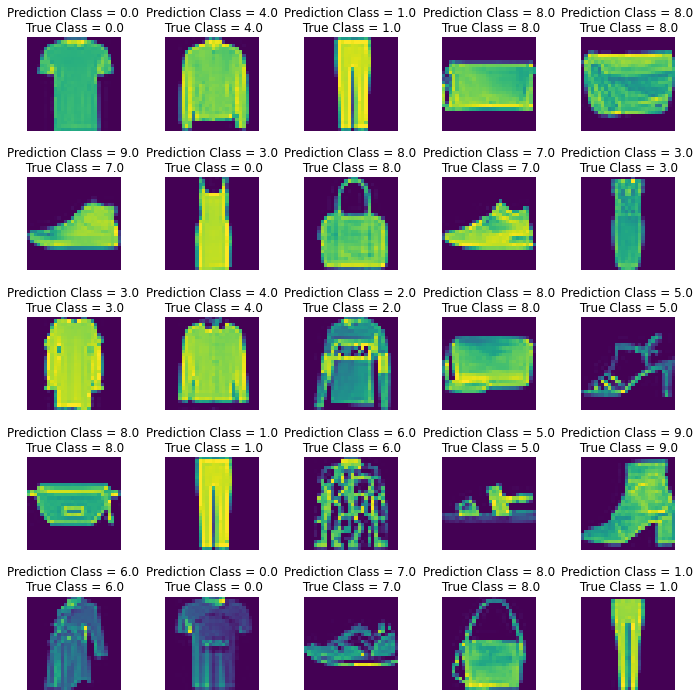

In [53]:
# visualize the results
W = 5
L = 5

# fig, size = plt.subplots(L_grid,w_grid)
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # flatten the 12 x 12 matrix into 255 array
n_testing = len(X_test)
for i in np.arange(0, W * L):
    # select random number
  index = random.randint(0, n_testing)
  axes[i].imshow(X_test[index].reshape(28,28), cmap='viridis')
  axes[i].set_title("Prediction Class = {:.1f}\n True Class = {:.1f}".format(predicted_classes[index],y_test[index]))
  axes[i].axis('off')
  
plt.subplots_adjust(hspace=0.5)

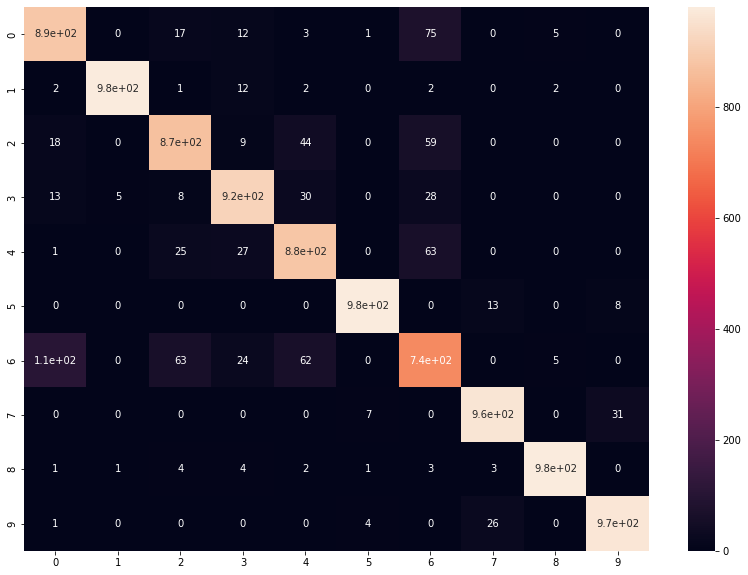

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted_classes)
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot= True)
# sum the diagonal element to get the the total true correct values

In [55]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.89      0.87      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.88      0.87      0.88      1000
     Class 3       0.91      0.92      0.91      1000
     Class 4       0.86      0.88      0.87      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.76      0.74      0.75      1000
     Class 7       0.96      0.96      0.96      1000
     Class 8       0.99      0.98      0.98      1000
     Class 9       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

